

authors: 
- [ADLANE KADRI](https://www.linkedin.com/in/adlan-kadri-788b66138/)
- [CELINE CHIOUT](https:)

---

**process steps:** 
```
> data preprocessing  ( HERE ) 
> word embeding 
> semantic models
> workflow
> app deployment (flask + docker)
```



## Librires

In [82]:
import shutil
import nltk
import os
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
#import numpy as np
from nltk.corpus import stopwords

%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


### nltk config

In [83]:
## load nltk modules:
nltk.download('wordnet')
nltk.download('stopwords')

## define a set of path: 
PATH = os.path.dirname(os.getcwd()) 
dataset_path = os.path.join(PATH, "dataset")

[nltk_data] Downloading package wordnet to /home/adlan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/adlan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# All Preprocessing Functions

In [84]:
def remove_empty_words_1(dataset):
    for i in range(dataset.shape[0]):
        review= dataset["reviews"][i]
        review=review.lower()
        #review = review.translate(string.maketrans("",""), string.punctuation)
        review = review.strip()

        review=review.replace("<br /><br />"," ")
        review=review.replace("<br />"," ")
        dataset["reviews"][i] = review 
    return dataset


def tokenize_data(dataset):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    for i in range(dataset.shape[0]):
        dataset["reviews"][i] = tokenizer.tokenize(dataset["reviews"][i])
    return dataset

def remove_stop_words(dataset):
    stop_words = set(stopwords.words('english'))
    for i in range(dataset.shape[0]):
        dataset["reviews"][i] = ([token.lower() for token in dataset["reviews"][i] if token not in stop_words])
    return dataset

def stemming(dataset):
    stemmer= nltk.stem.PorterStemmer()
    for i in range(dataset.shape[0]):
        dataset.reviews[i] = ([stemmer.stem(token) for token in dataset.reviews[i]])
    return dataset

def lemmatization(dataset):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    for i in range(dataset.shape[0]):
        dataset.reviews[i] = " ".join([lemmatizer.lemmatize(token) for token in dataset.reviews[i]]).strip()
    return dataset
def remove_garbage(dataset):
    garbage = "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/"
    for i in range(dataset.shape[0]):
        dataset.reviews[i] = "".join([char for char in dataset.reviews[i] if char not in garbage])
    return dataset

# Loading data && visialization functions

In [85]:

def load_data(positive_train_data_path, negative_train_data_path):
    """To load data we've reated before
    :param positive_train_data_path the path of all postive reviews
    :type  sting
    :param negative_train_data_path the path of all negative reviews
    :type  sting
    :return a dataset with labels
    :type pandas dataframe
    """
    data = []
    for file in os.listdir(positive_train_data_path):
        with open(os.path.join(positive_train_data_path + file), "r") as f:
            line = f.readlines()[0]
            data.append({"reviews": line, "labels":1})

    for file in os.listdir(negative_train_data_path):
        with open(os.path.join(negative_train_data_path + file), "r") as f:
            line = f.readlines()[0]
            data.append({"reviews": line, "labels":0})

    dataset = pd.DataFrame(data)
    return dataset


def preprocessing():
    """To preprocesse our dataset
    :return a dataset preprocessed
    :type pandas dataframe
    """
    pos_train_data_path = os.path.join(PATH, "dataset", "pos", "")
    neg_train_data_path = os.path.join(PATH, "dataset", "neg", "")
    dataset = load_data(pos_train_data_path, neg_train_data_path)
    dataset_not_treated = dataset.copy()
    
    dataset = remove_empty_words_1(dataset)
    dataset = tokenize_data(dataset)
    dataset = remove_stop_words(dataset)
    dataset = stemming(dataset)
    dataset = lemmatization(dataset)
    dataset = remove_garbage(dataset)
    return dataset, dataset_not_treated


def word_cloud_viz(data):
    """To visualize data as word cloud
    :param data to be visualized
    :type  pandas dataframe
    """
    data_1 = data.copy()
    data_1['text']= data_1['reviews'].str.lower()
    all_reviews = data_1['text'].str.split(' ')
    all_reviews.head()

    #import string
    all_reviews_cleaned = []

    for text in all_reviews:
        try:
            all_reviews_cleaned.append(' '.join(str(e) for e in text))
        except: 
            pass
    final_text_reviews = " ".join(all_reviews_cleaned)

    wordcloud_reviews = WordCloud(background_color="black").generate(final_text_reviews)
    plt.figure(figsize = (20,20))
    plt.imshow(wordcloud_reviews, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Test 

In [39]:
data_after, data_before = preprocessing()

all_data_xls = os.path.join(PATH, "dataset", "all_data.xlsx")
data_after.to_excel(all_data_xls, index = False, engine='xlsxwriter')

all_data_before_xpath = os.path.join(PATH, "dataset", "all_data_before.xlsx")
data_before.to_excel(all_data_before_xpath, index = False, engine='xlsxwriter')

In [40]:
data_after

,reviews,labels
0,recent saw movi intern busi class expect anyth...,1
1,featur hammer s allstar highli effect slice b...,1
2,girlfriend thing robots tri seek movi robots m...,1
3,nice pleasant funni earthshattering good jo...,1
4,first instal notori horror seri present woman ...,1
...,...,...
24994,know enki bilal s comic quit time see movie t...,0
24995,script scari movi 2 nt readi go problem film...,0
24996,possibl spoilers movi s reput preced antici...,0
24997,fact like music person opinion histor innacur...,0


In [41]:
data_before

,reviews,labels
0,I recently saw this movie in my International ...,1
1,"Featuring a few of Hammer's all-stars, this hi...",1
2,My girlfriend and I have a thing for Robots. S...,1
3,"Nice, pleasant, and funny, but not earth-shatt...",1
4,The first installment of this notorious horror...,1
...,...,...
24994,Knowing Enki Bilal's comics for quite some tim...,0
24995,"The script for ""Scary Movie 2"" just wasn't rea...",0
24996,[***POSSIBLE SPOILERS***] This movie's reputat...,0
24997,The fact that I did not like the music is a ve...,0


# Preprocessing pyspark

In [86]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [87]:
all_data_xls = os.path.join(PATH, "dataset", "all_data.xlsx")
all_data_before_xpath = os.path.join(PATH, "dataset", "all_data_before.xlsx")

before = pd.read_excel(all_data_before_xpath)
after = pd.read_excel(all_data_xls)


In [88]:
before

,reviews,labels
0,I recently saw this movie in my International ...,1
1,"Featuring a few of Hammer's all-stars, this hi...",1
2,My girlfriend and I have a thing for Robots. S...,1
3,"Nice, pleasant, and funny, but not earth-shatt...",1
4,The first installment of this notorious horror...,1
...,...,...
24994,Knowing Enki Bilal's comics for quite some tim...,0
24995,"The script for ""Scary Movie 2"" just wasn't rea...",0
24996,[***POSSIBLE SPOILERS***] This movie's reputat...,0
24997,The fact that I did not like the music is a ve...,0


In [89]:
after

,reviews,labels
0,recent saw movi intern busi class expect anyth...,1
1,featur hammer s allstar highli effect slice b...,1
2,girlfriend thing robots tri seek movi robots m...,1
3,nice pleasant funni earthshattering good jo...,1
4,first instal notori horror seri present woman ...,1
...,...,...
24994,know enki bilal s comic quit time see movie t...,0
24995,script scari movi 2 nt readi go problem film...,0
24996,possibl spoilers movi s reput preced antici...,0
24997,fact like music person opinion histor innacur...,0


# before  treatment

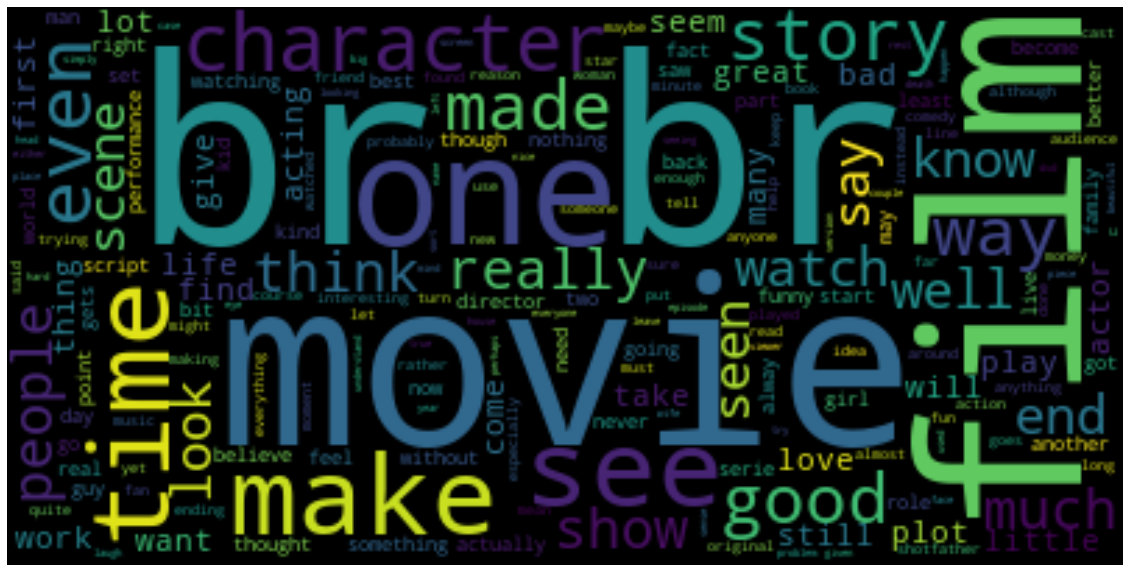

In [103]:
word_cloud_viz(before)

# After  treatment

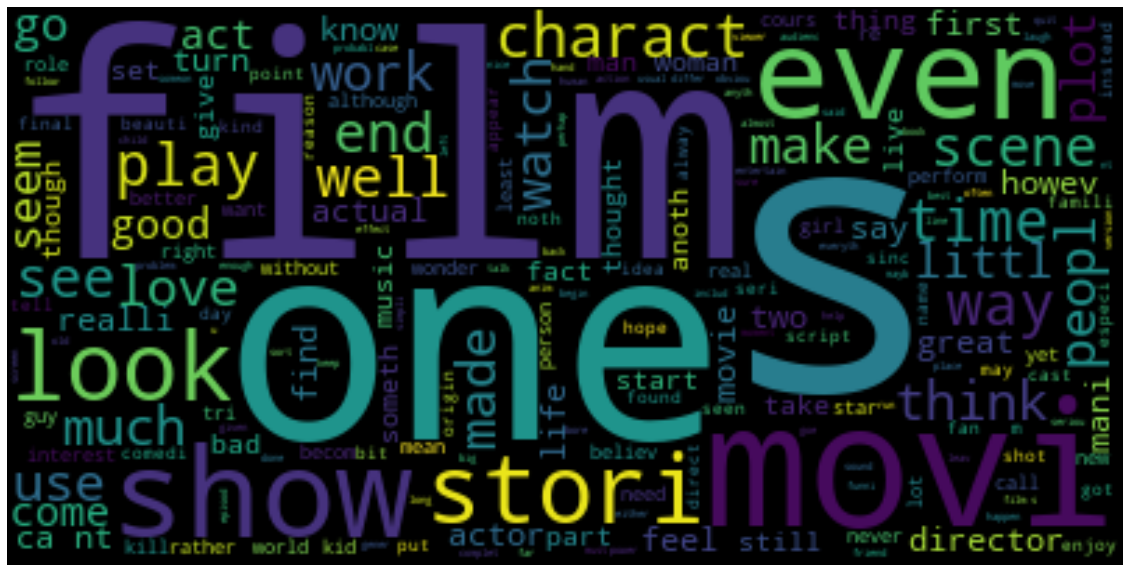

In [104]:
word_cloud_viz(after)